# Snow Sensor Usability Maps
Create global maps of where Passive Microwave sensors can be used for detecting snow properties

**Victoria Ly** (University of Washington) | vily@uw.edu

***
#### Data: 
- [Global Classifications from Google Earth Engine](https://code.earthengine.google.com/12891f3a5cf521b09fff1222d6b0a4ea)

***
### Set up Google Earth Engine API

In [18]:
# Import libraries.
import ee

from IPython.display import Image
import matplotlib.pyplot as plt
import rasterio
import xarray as xr
import numpy as np

In [19]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/xQFO3A6VE4cCQWnpntidO2YBhweiyatcVwRdsbLqjV-6NViJUY_-ka8

Successfully saved authorization token.


***
### Datasets

We're going to use a number of different datasets. So let's pull them in. 

In [4]:
# Test - Import a DEM from GEE and display a thumbnail of it.
dem = ee.Image('USGS/SRTMGL1_003')
Image(url=dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

Previously, I had resampled (mean) and reprojected these datasets to 25km in Google Earth Engine. 
A spatial resolution of 25km was chosen to best represent the resolution of Passive Microwave products. 

Here are the links to GEE for each of the datasets: 

MODIS Terra Surface Reflectance Daily Global (MOD09GA.006) for Cloud Cover: 
https://code.earthengine.google.com/d0407fbf3df162a0028dee541c4a31b9

MODIS Aqua Land Surface Temperature and Emissivity 8-Day Global (MYD11A2.006): https://code.earthengine.google.com/ad820d9fa605f25954141d31f411e663

Note to data availability: 

- Tree Canopy Cover (Hansen et. al): 2000-2018
- MODIS Surface Reflectance (MOD09GA): 2000-2019
- MODIS Land Surface Temp (MYD11A2.006): 2002-2019
- GlobSnow Monthly Avg SWE: 1979-2016 

Date range chosen for overlap: 2002-2018

In [5]:
#Set working directory

import os
os.getcwd()  # Prints the current working directory

os.chdir('C:\\Users\\vicki\\gee-classifications')
os.getcwd()

'C:\\Users\\vicki\\globalsnowmaps\\notebooks'

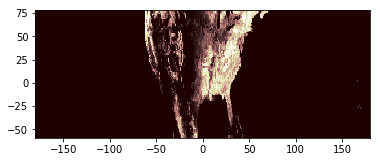

In [15]:
# Import Tree Canopy Cover (hansen et. al v1.6) 

src = rasterio.open('tree_25km_mean.tif')
plt.imshow(src.read(1), origin='upper',extent=[-180,180,-59,78,],cmap='pink')

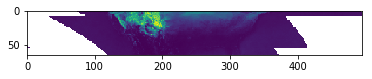

In [18]:
# Import MODIS Cloud Cover

src2 = rasterio.open('MOD_Clouds_25km_month01.tif')
plt.imshow(src2.read(1))

In [9]:
# Import MODIS Land Surface Temperature (LST)


var west = -180;
var east = 180;
var north = 78;
var south = -59;

In [10]:
# Import GlobSnow 

***
### Thresholds

Define the thresholds for each parameter. These are all based on previously published literature

In [11]:
# Define Tree Canopy Cover percentage thresholds
var lowerbound_trees = 30
var upperbound_trees = 50  

# Define Snow Melt thresholds with Land Surface Temperature [Celsius]
var upperbound_LST = 0

# Define SWE thresholds [mm]
var lowerbound_SWE = 10
var upperbound_SWE = 300

# Define Cloud Cover thresholds
# var lowerbound_clouds = 0.4
# var upperbound_clouds = 0.7

# Define Elevation thresholds
# var lowerbound_elevation = 300
# var upperbound_elevation = 500

# Define Slope thresholds 
# var lowerbound_slope = 0.2
# var upperbound_slope = 0.5


SyntaxError: invalid syntax (<ipython-input-11-1bdfa60fbb8d>, line 2)

# compare classified images, increasing with threshold for tcc

In [20]:
# Import classified image, with all input bands, for the month of January 
img = ee.Image('users/victorialy/PM_classif_month01')
Image(url=img.getThumbUrl({'bands':['Sensor_Classification'], 
                           'min': 0, 'max': 2, 'palette': ["c15433","1d8e30","dcd72b"]}))

In [21]:
# Import classified image, with all input bands, for the month of January 
img2 = ee.Image('users/victorialy/PM_classif_month01_tcc3040')
Image(url=img2.getThumbUrl({'bands':['Sensor_Classification'], 
                           'min': 0, 'max': 2, 'palette': ["c15433","1d8e30","dcd72b"]}))

In [22]:
# Import classified image, with all input bands, for the month of January 
img3 = ee.Image('users/victorialy/PM_classif_month01_tcc4050')
Image(url=img3.getThumbUrl({'bands':['Sensor_Classification'], 
                           'min': 0, 'max': 2, 'palette': ["c15433","1d8e30","dcd72b"]}))


In [11]:
img2= ee.Image('users/victorialy/PM_non_mtn_mask')
Image(url=img2.getThumbUrl({}))
